<div style="color:gray;font-size:2.5rem;">  
      Project : Invastigate A Dataset - The IMDB 5000 Movies Dataset 
</div> 
<br><br>
<div style="font-size:2rem;color:#303033">
    Table of Contents
</div>

<ul style="list-style-type:square">
<li><a style="text-decoration:none;color:#303033" href="#intro">Introduction</a></li>
<li><a style="text-decoration:none;color:#303033" href="#que">Questions</a></li>
<li><a style="text-decoration:none;color:#303033" href="#wrangling">Data Wrangling</a></li>
<li><a style="text-decoration:none;color:#303033" href="#eda">Exploratory Data Analysis</a></li>
<li><a style="text-decoration:none;color:#303033" href="#conclusions">Conclusions</a></li>

</ul>

<div style="color:gray;font-size:2rem;font-weight:600" id="intro">  
      Introduction
</div> 

> We are going to investigate [Kaggle's IMDB 5000 Movies Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). We'll try to get an idea of the movie genres over the year and what types of atrributes are related to to a movie with good rating. We'll also try to find out which actors , direcors or production componies are related to a good rating for a movie. For some movies , They do well on box office because they're related to some big celebrity names or some big production componies. We'll also try to figure out whether a good rating is related to box office collections.


<div style="color:gray;font-size:2rem;font-weight:600" id="que">  
      Questions we'll try to figure out
</div> 

1. Are there any atrributes related to higher popularity ?
2. What genres are likely to have higher popularity ?
3. Are higher movie popularity and profit related ?
4. What genres are likely to have more profit ? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
sns.set_style("whitegrid")
filterwarnings("ignore")
sns.set(font_scale=1.3)

In [2]:
df = pd.read_csv("tmdb-movies.csv")

### Basic Insights Of Our Data

In [3]:
print ("Number Of Rows,Columns : ",df.shape,"\n")
print ("\nColumns : ",df.columns)
print ("\n")

Number Of Rows,Columns :  (10866, 21) 


Columns :  Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')




<div style="color:gray;font-size:2.5rem;font-weight:600" id="wrangling">  
      Data Wrangling
</div> 

### General Properties
+ Let's find out columns having multiple values and invalid datatypes. 

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


+ In cast columns we have a '|' in between cast names. Since it looks like first Actor is the main cast let's create a separate column for lead_cast. 
<br><br>
+ genre and production componies have same problem. But we can not have only one of them, so we'll create saperate DataFrames acording to Genre and Production componies. We'll creat saperate column for every genre and production compony with yes or no as values.
<br><br>
+ Let's find out numerical anomalies.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.duplicated().sum()

1

+ We have a huge amount of null values in **homepage** columns, But a movie's website can't affect any of our questions. We can ignore or we can drop the homepage column. It will also help us freeing some memory.
<br><br>
+ Columns like **id**,**imdb_id**,**overview**,**tagline** and **keywords** are not related to our analysis process so we'll drop them. In the last we'll analyse keywords and tagline column separately.
<br><br>
+ **cast** and **production_componies** columns have a lot of null values we can either try and fetch them from the internet or we can ignore them from now. If It affects any of our decision we'll try and fix them later.
<br><br>
+ Columns like **cast**,**runtime** and **genre** have a little amount of null values so we'll drop rows with null values. 
<br><br>
+ We're also having a duplicated column too. We'll drop it in the process.

### Data Wrangling 

+ let's drop some columns and creat some new dataframes.
<br><br>
+ We'll also create separate dataset for genres with every genre as columns having values 1 or 0.
<br><br>
+ Let's assume that first actor/actress is lead of the movie and create column with lead actors.

In [7]:
# Droping Unnessacary Columns
df_words = df[['keywords','tagline']].copy()
df = df.drop(columns=['homepage','id','imdb_id','overview','tagline','keywords'])

In [8]:
# Let's create a dummy dataset  to process further.

df = df.drop_duplicates()
df_genre = df[['genres','popularity','director','runtime', 'vote_average', 'release_year', 'budget_adj',
        'revenue_adj']].copy()
df_genre = df_genre.dropna()

# Creating Genre list to create columns.
genres = set()
for i in df_genre.genres:
    for genre in i.split("|"):
        genres.add(genre)
        
# Genre Dataset
for col in genres:
    df_genre[col] = df_genre.genres.apply(lambda x:1 if col in x else 0)
    
df_genre = df_genre.drop(columns=['genres'])

# let's drop genres from main df

df = df.drop(columns=['genres'])

# Let's create Lead Actor Column 

df['cast'] = df.cast.apply(str)
df['lead_role'] = df.cast.apply(lambda x:x.split("|")[0])
df = df.drop(columns=['cast'])

<div style="color:gray;font-size:2.5rem;font-weight:600" id="eda">  
      Exploratory Data Analysis
</div> 

> We have our main dataframe and genre dataframe. So first of all let's answer all our questions. But first let's plot some statstics 

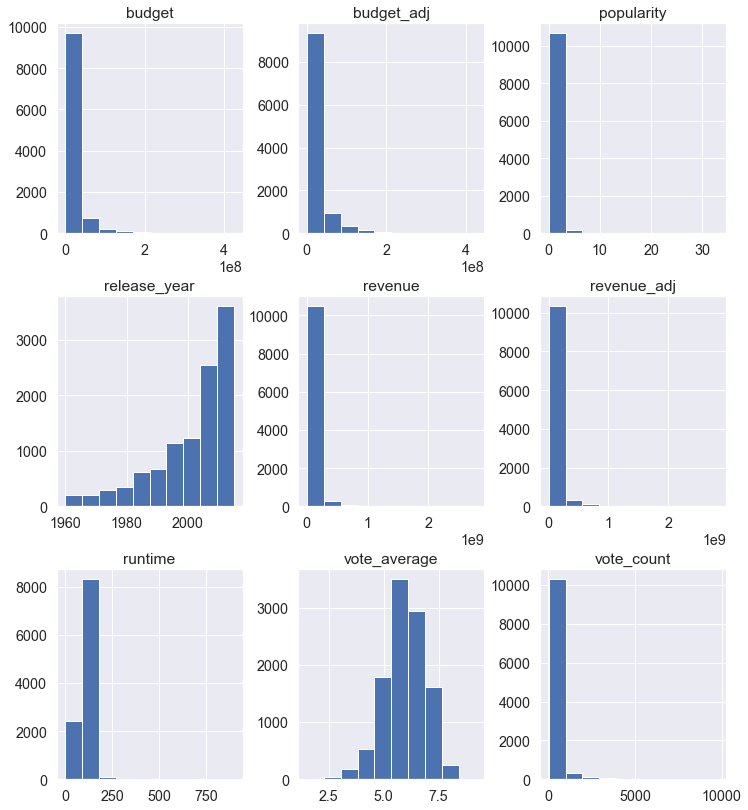

In [9]:
df.hist(figsize=(12,12))
plt.subplots_adjust(top=1)

**Let's get on our first question**
<br><br>
<div style="color:gray;font-size:2rem;font-weight:600" id="que1">  
    Are there any atrributes related to higher popularity ?
</div> 

> We'll use popularity and vote_average to make our graphs and assumptions.

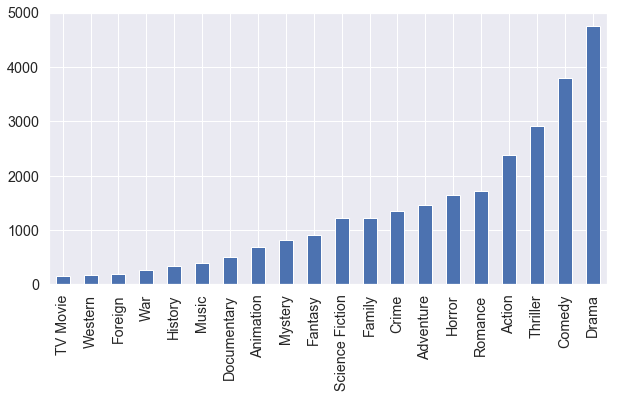

In [10]:
df_genre[genres].sum().sort_values().plot.bar(figsize=(10,5))

+ So there are more number of drama, comedy and thriller films compared to other film genres. Let's assume that these three genres makes big bucks on the box office since there are more productions of these movies. 
<br><br>
+ Let's plot average popularity and vote_average for different genres.


Text(0.5, 1.0, 'Popularity Of Different Genres')

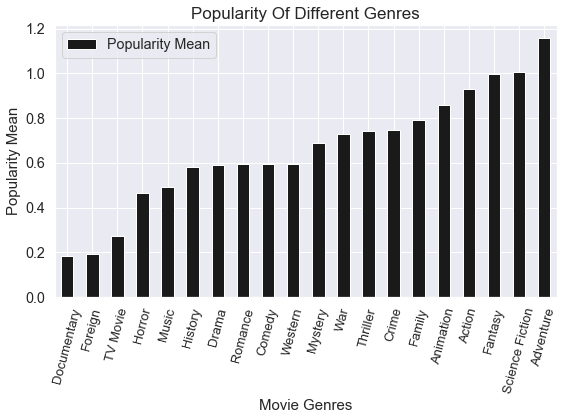

In [11]:
avg_popularity = []

for col in genres:
    avg_popularity.append(df_genre['popularity'][df_genre[col] ==  1].mean())

pd.DataFrame({"Popularity Mean":avg_popularity}, index=list(genres)).sort_values(by='Popularity Mean').plot.bar(figsize=(9,5),color='k')
plt.xticks(rotation=75, fontsize = 13)
plt.xlabel("Movie Genres",fontsize=15)
plt.ylabel("Popularity Mean",fontsize=15)
plt.title("Popularity Of Different Genres",fontsize=17)

Since this graph is a little different from graph of genre count, our first assumption is wrong. It looks like Adventure, Science Fiction , Fantasy and Action movies have a better popularity over others. 

### Our second question is also answered with this graph, since Adventure genre is having higher average popularity.

In [12]:
df_lead = df[['lead_role','popularity']].dropna()

Text(0.5, 1.0, 'Top 50 Actors According To Popularity Of Movies')

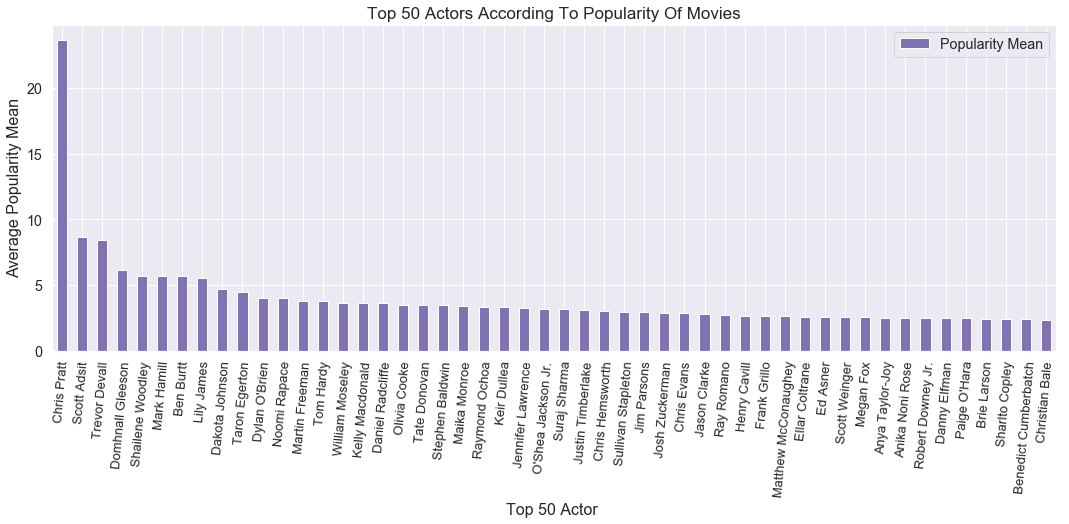

In [13]:
actors = df_lead.lead_role.unique()
avg_mean = []
for actor in actors:
    avg_mean.append(df_lead.popularity[df_lead.lead_role == actor].mean())


pd.DataFrame({"Popularity Mean":avg_mean}, index=actors).sort_values(by='Popularity Mean',ascending=False).head(50).plot.bar(figsize=(18,6),color='m')
plt.xticks(rotation=85, fontsize = 13)
plt.xlabel("Top 50 Actor ",fontsize=16)
plt.ylabel("Average Popularity Mean",fontsize=16)
plt.title("Top 50 Actors According To Popularity Of Movies",fontsize=17)

+ So we have chris pratt having highest rating, but it seems little odd as it is way to higher than other actors in list. We'll consider this as an outlier, becuase it seems one of the chris pratt's movies is having very high popularity rating. 

+ But for the rest of graph we can't say actors are much related to movie rating. As graph is almost uniform distribution we can't say that they're related to a good movie popularity.


Text(0.5, 1.0, 'Top 50 Actors According To Popularity Of Movies')

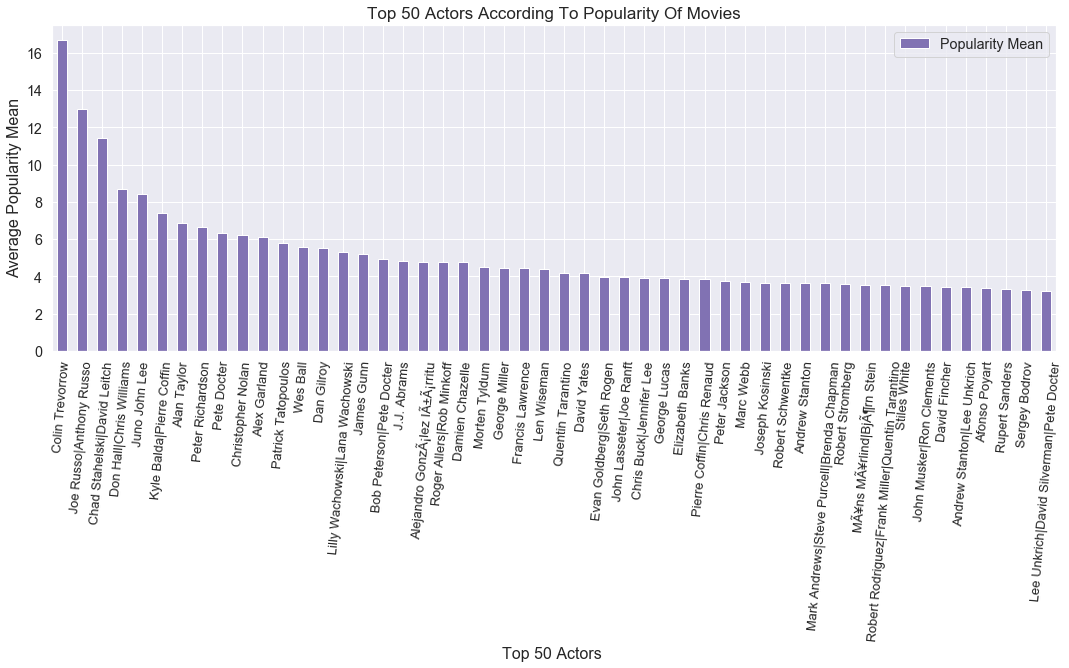

In [14]:
df_dir = df[['director','popularity']].dropna()
dirs = df_dir.director.unique()
avg_means = []
for dic in dirs:
    avg_means.append(df_dir['popularity'][df_dir.director ==  dic].mean())

pd.DataFrame({"Popularity Mean":avg_means}, index=dirs).sort_values(by='Popularity Mean',ascending=False).head(50).plot.bar(figsize=(18,6),color='m')
plt.xticks(rotation=85, fontsize = 13)
plt.xlabel("Top 50 Actors ",fontsize=16)
plt.ylabel("Average Popularity Mean",fontsize=16)
plt.title("Top 50 Actors According To Popularity Of Movies",fontsize=17)

+ Colin Trevorrow is director of the movie [Jurassic Park](https://www.imdb.com/name/nm1119880/) , the same movie which helped chris pratt in getting a greater score. So we can consider this an another outlier.

+ But for others looks like Joe and Anthony Russo are having  a good popularity, we can consider the fact that they have directed some of the marvel movies. 

+ So we cannot say that a director is having any kind of relation to a good movie rating since rest of the graph is almost uniform.

> Since we can't say that Actors and Directors are so much related to a good populairyt, we'll try for production componies. Let's find out if any specific Production componies makes good movies.

In [15]:
df_prod = df[['production_companies','popularity']].copy()
df_prod = df_prod.dropna()

# Creating Genre list to create columns.
prods = set()
for i in df_prod.production_companies:
    for prod in i.split("|"):
        prods.add(prod)
        
# Genre Dataset
for col in prods:
    df_prod[col] = df_prod.production_companies.apply(lambda x:1 if col in x else 0)
    
df_prod = df_prod.drop(columns=['production_companies'])

Text(0.5, 1.0, 'Top 50 Production Componies With highest movie popularities')

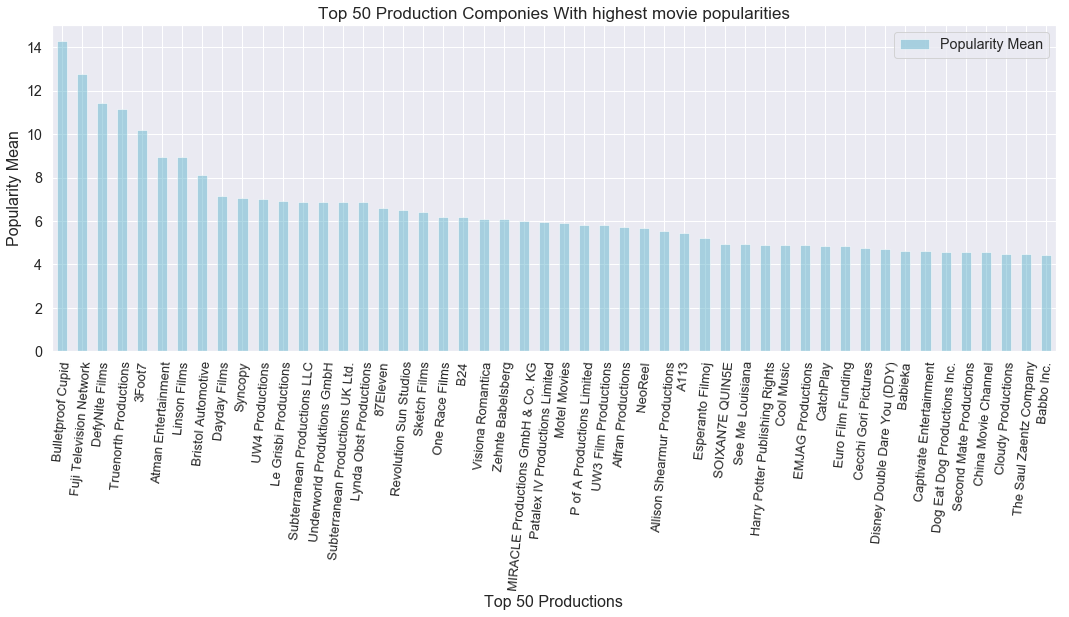

In [16]:
prod_means = []
for prod in prods:
    prod_means.append(df_prod.popularity[df_prod[prod] == 1].mean())
    
pd.DataFrame({"Popularity Mean":prod_means}, index=prods).sort_values(by='Popularity Mean',ascending=False).head(50).plot.bar(figsize=(18,6),color='c',alpha=0.5)
plt.xticks(rotation=85, fontsize = 13)
plt.xlabel("Top 50 Productions",fontsize=16)
plt.ylabel("Popularity Mean",fontsize=16)
plt.title("Top 50 Production Componies With highest movie popularities",fontsize=17)

> I'm a little comfused, as this graph tells a whole different story. Since we have only two chris pratt movies, and they are both highly rated movies they are creating some problems. Because Both movies are rated 34 and 14 , Chris pratt, James Gun and Colin Trevorrow are having such high populairty in their respective graphs.

> We can't make assumptions based on just 2 movies, so we'll contiue our quest.

### So we san say that from given attributes only Genre of the movie is likely to be related with a good popularity rating. 


**Let's get on our second question**
<br><br>
<div style="color:gray;font-size:2rem;font-weight:600" id="que1">  
    Are higher movie popularity and profit related ?
</div> 

> We'll use popularity and vote_average to make our graphs and assumptions.

Text(0, 0.5, 'Revenue (In U.S Dollars)')

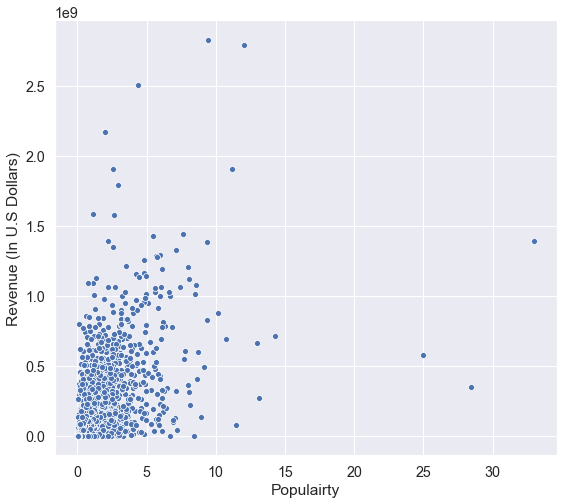

In [17]:
plt.figure(figsize=(9,8))
sns.scatterplot(df.popularity,df.revenue_adj)
plt.xlabel("Populairty")
plt.ylabel("Revenue (In U.S Dollars)")

it looks like popularity is having some kind of relation with earnings of a movie.

In [18]:
df['profit'] = df.revenue_adj - df.budget_adj

Text(0, 0.5, 'Profit (In U.S Dollars)')

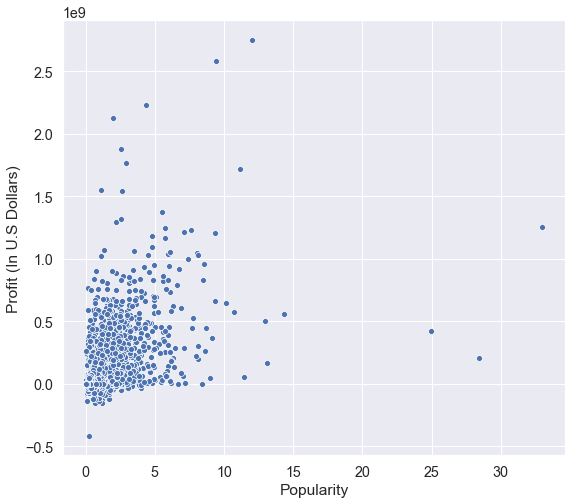

In [19]:
plt.figure(figsize=(9,8))
sns.scatterplot(df.popularity,df.profit)
plt.xlabel("Popularity")
plt.ylabel("Profit (In U.S Dollars)")

This looks like same as the graph above, but there's a minor change in y axes. It seems some of the movies were in loss as y axes is going minus. This indicates that some of the movies were going into losses. This also indicates that a good popularity rating and Movie profit have almost same correlation as Revenue and Popularity rating.

### We can draw conclusion that more popularity tends to have earn more profits.

**Let's get on our third question**
<br><br>
<div style="color:gray;font-size:2rem;font-weight:600" id="que1">  
    What genres are likely to have more profit ? 
</div> 

> We'll use popularity and vote_average to make our graphs and assumptions.

In [20]:
df_genre['profit'] = df.profit
df_genre['budget_adj'] = df.budget_adj
df_genre['revenue_adj'] = df.revenue_adj

Text(0.5, 1.0, 'Correlation Between Genres and Profit')

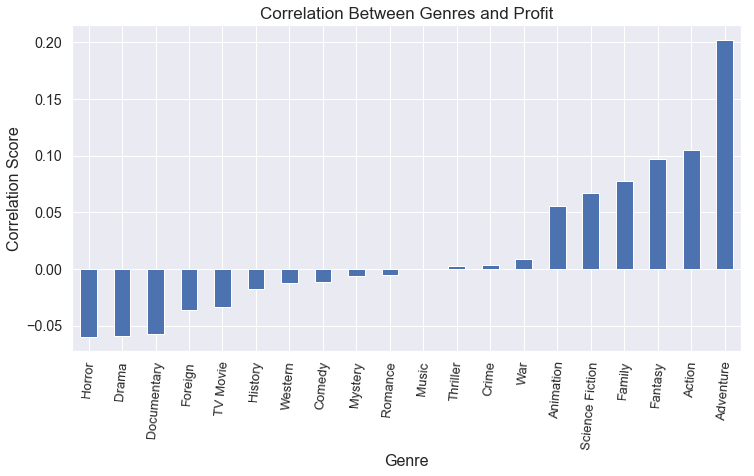

In [21]:
plt.figure(figsize=(12,6))
cols = list(genres)
cols.append('profit')
df_genre[cols].corr()['profit'].head(-1).sort_values().plot.bar()
plt.xticks(rotation=85, fontsize = 13)
plt.xlabel("Genre",fontsize=16)
plt.ylabel("Correlation Score",fontsize=16)
plt.title("Correlation Between Genres and Profit",fontsize=17)

Text(0.5, 0, 'Genres')

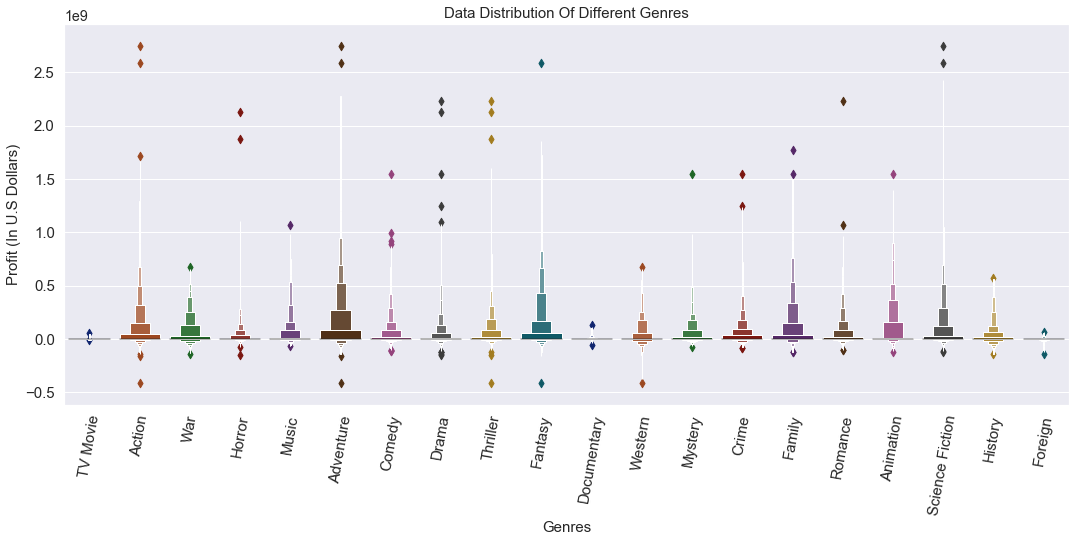

In [22]:
profit,genrearr = [],[]

for genre in genres:
    tcol = df_genre.profit[df_genre[genre] == 1]
    profit +=(tcol.tolist())
    genrearr +=(np.repeat(genre,len(tcol)).tolist())
    
genre_profit = pd.DataFrame({"Profit":profit,"Genre":genrearr})
plt.figure(figsize=(18,7))
sns.boxenplot(x="Genre",y='Profit',data=genre_profit,palette="dark")
plt.title("Data Distribution Of Different Genres",fontsize=15)
plt.xticks(fontsize=15,rotation=80)
plt.yticks(fontsize=15)
plt.ylabel("Profit (In U.S Dollars)",fontsize=15)
plt.xlabel("Genres",fontsize=15)

> This box plot makes our assumption right. Boxplot of Adventure looks more concentrated and have outliers above average profits of other movies.

### It looks like movies in adventure genre earns more profits compared to other genres.

#### For little further exploration, let's create word cloud for taglines and keyword.

In [23]:
from wordcloud import WordCloud
wordc = WordCloud(background_color="white", mode="RGBA")

(-0.5, 399.5, 199.5, -0.5)

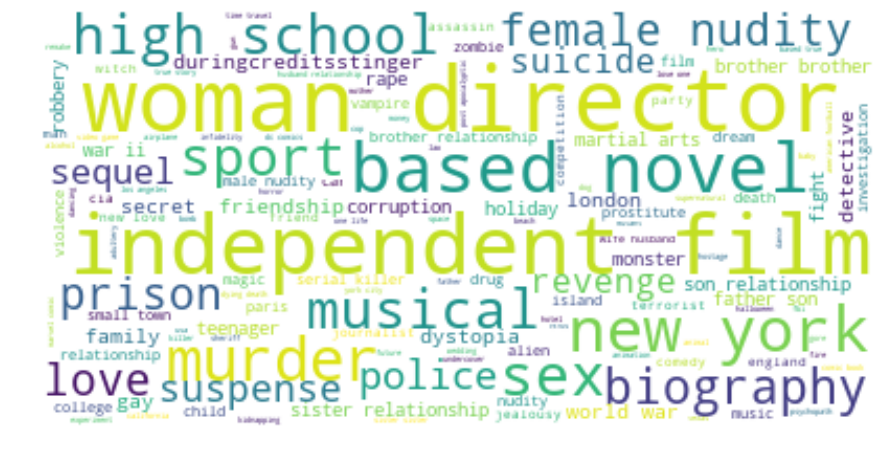

In [24]:
words = []

for word in df_words.keywords.dropna().apply(lambda x:x.split("|")):
    words += word    

plt.figure(figsize=(15,15))
plt.imshow(wordc.generate(" ".join(words)), interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

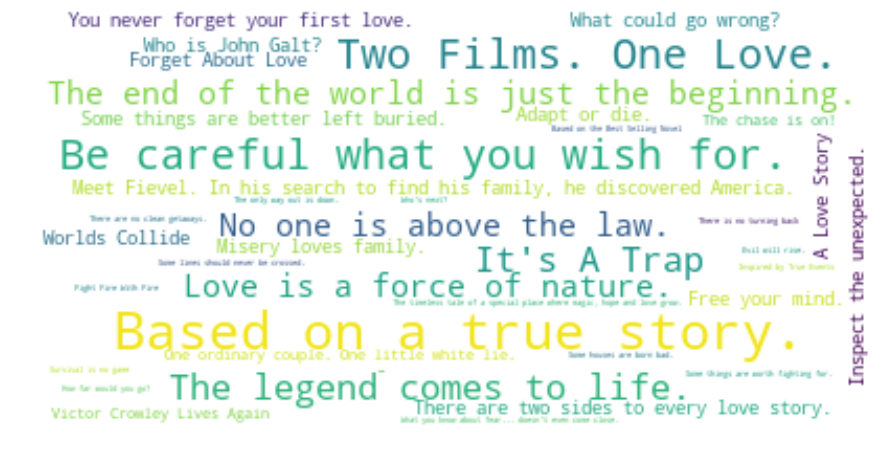

In [25]:
plt.figure(figsize=(15,15))
plt.imshow(wordc.generate_from_frequencies(df_words.tagline.value_counts()), interpolation="bilinear")
plt.axis("off")

## Conclusion

> For our first question, we can say that genres matters in having a good popularity rating. Since Adventure Genre is having more popularity compared to other genres.

> Also , Higher popularity rating leads to higher profit. And since adventure genre is having higher popularity compared to other genres , it also has higher Profit compared to other genres. 

> Both word clouds shows some of the most used Taglines Such as `Based On True Story`, `Based On The Best Selling Novel` and `Be Careful what you wish fot.` and Keywords like `women director`,`independent film`,`murder`, `suspense` and `musical`.